# <center>Quora Insincere Questions Classification </center>


## 1. Business Problem

Quora: An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

Here's your chance to combat online trolls at scale. Help Quora uphold their policy of “Be Nice, Be Respectful” and continue to be a place for sharing and growing the world’s knowledge.

Link : <a> https://www.kaggle.com/c/quora-insincere-questions-classification </a>

Problem Statement:
__Detect toxic content to improve online conversations__

## Source/useful Links

- Source : https://www.kaggle.com/c/quora-insincere-questions-classification

## Real world/Business Objectives and Constraints ¶

1. The cost of a mis-classification can be very high.
2. No strict latency concerns.
3. Interpretability is partially important.

# 2. Machine Learning Problem 

## 2.1 Data
### 2.1.1 Data  Overview

1. Data will be in train.csv
2. Train data consist of 3 columns: Qid, Question_text, Target
3. Size of Train.csv 118 MB
4. Number of rows in Train.csv (Data Points) -1306122

### 2.1.2 Example Data Point

<pre>
"qid","question_text","target"
"00002165364db923c7e6","How did Quebec nationalists see their province as a nation in the 1960s?,"0"
"00056d45a1ce63856fc6","Why do females find penises ugly?","1"
"0004a41beea5f02d85ef","What are some good songs for a long journey?","0"
</pre>

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem

Task: In this competition you will be predicting whether a question asked on Quora is sincere or not.
It is a binary classification problem, for a given questions we need to predict it is toxic question or not. 

### 2.2.2 Performance Metric
Source: 

Metric(s):  Data is highly imbalanced there for precision, recall and f1-score are the good matrices.
    
    
* F1-Score : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix


## 2.3 Train and Test Construction

Test data is gave in the separate file.

Number of rows in test.csv - 375806.

Dataset: It consist of train and test data.
    In train
    1. Qid
    2. Question_text
    3. Target
    
Type of Problem:
    1. It is binary classisfication task problem
    Class 0: If question_text is not toxic
    Class 1: If question_text is toxic
    
Latency:
    No strict latency of the problem

Some what it is necessary to give the reasoning of why this question is toxic
    Data Interpretebility

If give the wrong answer then it is more impact on the cridibility(faith) of the quora website.

Performance Metrics:
    Confusion Matrix
    F1-score







<b>Task:</b> In this competition you will be predicting whether a question asked on Quora is sincere or not.



## 3. Exploratory Data Analysis

In [1]:
# import libraries
# 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import re
from tqdm import tqdm
import random
import regex
import gensim

from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler

import os
import nltk
import pickle

### 3.1.1 Reading Data and Basic Stats

In [11]:
train = pd.read_csv('train.csv')#, nrows=700000)

print ("Number of data points:", train.shape)

Number of data points: (1306122, 3)


In [12]:
train.head()

qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
test = pd.read_csv('test.csv')
print (test.shape)

(375806, 2)


In [8]:
train.describe(include="all")

qid  \
count                 700000   
unique                700000   
top     7ca48bcb006a2459c9c5   
freq                       1   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                            question_text         target  
count                                              700000  700000.000000  
unique                                             700000            NaN  
top     What are the things a government can do to enc...            NaN  
freq                                                    1            NaN  
mean                                                  NaN       0.061569  
std                                                   NaN       0.240370  
min                                                   NaN       0.000000  
25%                                                   NaN       0.000000  
50%                                                   NaN       0.000000  
75%                                                   NaN       0.000000  
max                                                   NaN       1.000000

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 3 columns):
qid              700000 non-null object
question_text    700000 non-null object
target           700000 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.0+ MB


### 3.1.2  Distribution of Data in output classes


In [46]:
print ("Total Number  of data points for training:", data.shape[0])

Total Number  of data points for training: 700000


In [47]:
data.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [48]:
# Unique target class
print (data.target.unique())

[0 1]


In [49]:
# Each class count
print (data.target.value_counts())

0    656902
1     43098
Name: target, dtype: int64


In [50]:
# Number of toxis class data points
count = np.sum(data.target)
count

43098

In [14]:
# Percentage of each class

print (train.target.value_counts(1)[0] * 100, "%")
print (train.target.value_counts(1)[1] * 100, '%')

93.81298224821265 %
6.187017751787352 %


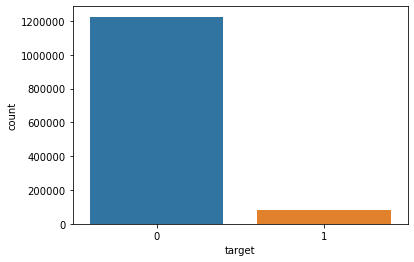

In [13]:
sns.countplot(train.target)

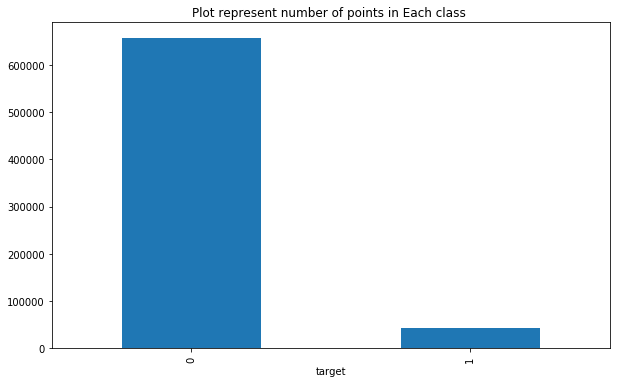

In [52]:
# Bar graph
plt.figure(figsize=(10, 6))
plt.title('Plot represent number of points in Each class ')
data.groupby("target")['qid'].count().plot.bar()


It shows that data is highly imbalanced

### Check for Duplicate

In [15]:
duplicate_question = train[['question_text', 'target']].groupby(['question_text']).count().reset_index()
print (duplicate_question.shape)
print ("Number of duplicate questions:",train.shape[0] - duplicate_question.shape[0])

(1306122, 2)
Number of duplicate questions: 0


### Check any Null Values

In [17]:
# Filling the null values with ' '
data = train.fillna('')
nan_rows = train[data.isnull().any(1)]
print (nan_rows)
print ("Number of empty rows:",len(nan_rows))

Empty DataFrame
Columns: [qid, question_text, target]
Index: []
0


In [18]:
# Data Visualization
def cloud(text, title, size = (10,7)):
    # Processing Text
    wordcloud = WordCloud(width=800, height=400,
                          collocations=False
                         ).generate(" ".join(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=25,color='w')
    plt.tight_layout(pad=0)
    plt.show()


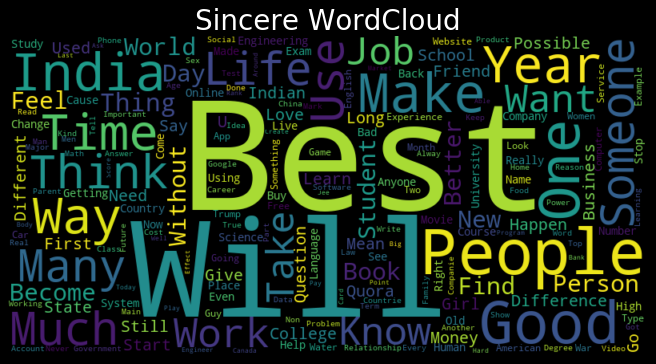

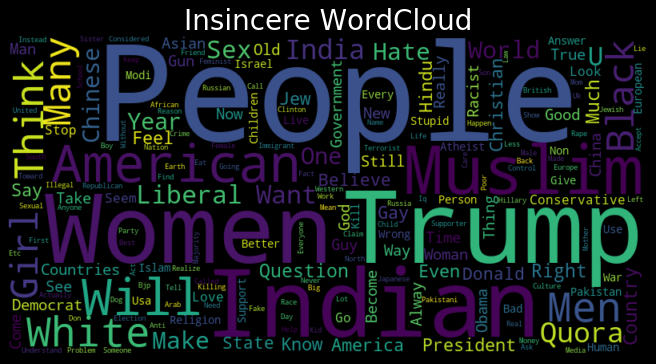

In [19]:
# https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml
for i,name in [(0,"Sincere"),(1,"Insincere")]:
     cloud(train.loc[data.target == i,"question_text"].str.title(), title="{} WordCloud".format(name), size=[8,5])

## 3.2 Basic Feature Extraction (before cleaning)

Let's now construct a few features like:
- ____Number of words in the question____= Length of Question q_len
- ___Number of Capital Words____= 
- ____Number of stop words in the question____=
- ___Number of different words in the question____=
- ___Number of user tags @ in the question____=
- ____Number of numerical values in the question____ = Numbers in the question
- ____Number of characters in the question____= Length of character in Question qchar_len
- ____Number of upper characters in the question____= Upper characters in the question
- ____Number of lower characters in the question____ = Lower characters in the question
- ___Average word length of word in the question___ -








In [ ]:
# Text cleaning https://www.kaggle.com/sunnymarkliu/more-text-cleaning-to-increase-word-coverage
# https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml

In [26]:
stopword = stopwords.words('english')
#stopword

In [20]:
train.shape

(1306122, 3)

In [53]:
# ML Features https://www.kaggle.com/nicapotato/eli5-shap-lgbm-lr-interpretable-ml

if os.path.isfile('data_without_preprocessing7l.csv'):
    data = pd.read_csv('data_without_preprocessing7l.csv')
else:
    # Question Length
    train['q_len'] = train['question_text'].str.len()
    # Number of words in the question
    train['q_words'] = train['question_text'].apply(lambda row: len(row.split(" ")))
    # Number of Upper character in question
    train['u_chars'] = train['question_text'].apply(lambda row: sum(1 for c in row if c.isupper()))
    # Number of lower character in question
    train['l_chars'] = train['question_text'].apply(lambda row: sum(1 for c in row if c.islower()))
    # Number of stopwords in question
    train['n_stopwords'] = train['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word in stopword))
    # Number of capital words in question
    train['n_cap_words'] = train['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word.isupper()))
    # Number of different words in question
    data['n_diff_words'] = data['question_text'].apply(lambda row: len(set(row.split(" "))))
    # Averge Word length
    data['avg_word_len'] = data['question_text'].apply(lambda row: sum(len(i) for i in row.split(" "))/len(row.split(" ")))
    # Number of numerical Values in the text
    data['n_numerical_words'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if word.isnumeric()))
    # Number of * in the question 
    data['n_user_tags'] = data['question_text'].apply(lambda row: sum(1 for c in row if c=='@'))
    # Number of * in the question 
    data['n_star'] = data['question_text'].apply(lambda row: sum(1 for c in row if c=='*'))
    
    # Number of F words - f**k contains folk, fork,
    data['nb_fk'] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r'[Ff]\S{2}[Kk]', word)))
    
    # Number of S word
    data["nb_sk"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Ss]\S{2}[Kk]", word)))
    # Number of D words
    data["nb_dk"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[dD]ick", word)))
    # Number of incest
    data["nb_inst"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[iI]cest", word)))
    # Number of bestiality
    data["nb_bstlty"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[bB]estiality", word)))
    # Number of pedophilia
    data["nb_pedophilia"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[pP]edophilia", word)))
    
    # Number of occurence of You, insulting someone usually needs someone called : you
    data["nb_you"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\W[Yy]ou\W", word)))
    # Just to check you really refered to my mother or mom ;-)
    data["nb_mother"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wmother\W", word)or re.findall(r"\Wmom\W", word)))
    # Just checking for toxic 19th century vocabulary
    data["nb_ng"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"\Wnigger\W", word)))
    # Just checking for rape vocabulary
    data["nb_rp"] = data['question_text'].apply(lambda row: sum(1 for word in row.split(" ")if re.findall(r"[Rr]ape\W", word)))
    
    data.to_csv("data_without_preprocessing7l.csv", index=False)

print (data.shape)
data.head()
    

(700000, 24)


qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  q_len  q_words  u_chars  l_chars  n_stopwords  n_cap_words  \
0       0     72       13        2       53            6            0   
1       0     81       16        1       63            8            0   
2       0     67       10        2       54            1            0   
3       0     57        9        4       44            2            0   
4       0     77       15        3       59            5            2   

   n_diff_words  ...  nb_fk  nb_sk  nb_dk  nb_inst  nb_bstlty  nb_pedophilia  \
0            13  ...      0      0      0        0          0              0   
1            15  ...      0      0      0        0          0              0   
2             8  ...      0      0      0        0          0              0   
3             9  ...      0      0      0        0          0              0   
4            15  ...      0      0      0        0          0              0   

   nb_you  nb_mother  nb_ng  nb_rp  
0       0          0      0      0  
1       0          0      0      0  
2       0          0      0      0  
3       0          0      0      0  
4       0          0      0      0  

[5 rows x 24 columns]

In [54]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

### 3.1.1. Analysis of some the text features 


In [55]:
temp_data = data.drop(['qid', 'question_text'],axis = 1)
temp_data.head()

target  q_len  q_words  u_chars  l_chars  n_stopwords  n_cap_words  \
0       0     72       13        2       53            6            0   
1       0     81       16        1       63            8            0   
2       0     67       10        2       54            1            0   
3       0     57        9        4       44            2            0   
4       0     77       15        3       59            5            2   

   n_diff_words  avg_word_len  n_numerical_words  ...  nb_fk  nb_sk  nb_dk  \
0            13      4.615385                  0  ...      0      0      0   
1            15      4.125000                  0  ...      0      0      0   
2             8      5.800000                  0  ...      0      0      0   
3             9      5.444444                  0  ...      0      0      0   
4            15      4.200000                  0  ...      0      0      0   

   nb_inst  nb_bstlty  nb_pedophilia  nb_you  nb_mother  nb_ng  nb_rp  
0        0          0              0       0          0      0      0  
1        0          0              0       0          0      0      0  
2        0          0              0       0          0      0      0  
3        0          0              0       0          0      0      0  
4        0          0              0       0          0      0      0  

[5 rows x 22 columns]

In [21]:
# Number of columns in the data
len(data.columns)

24

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


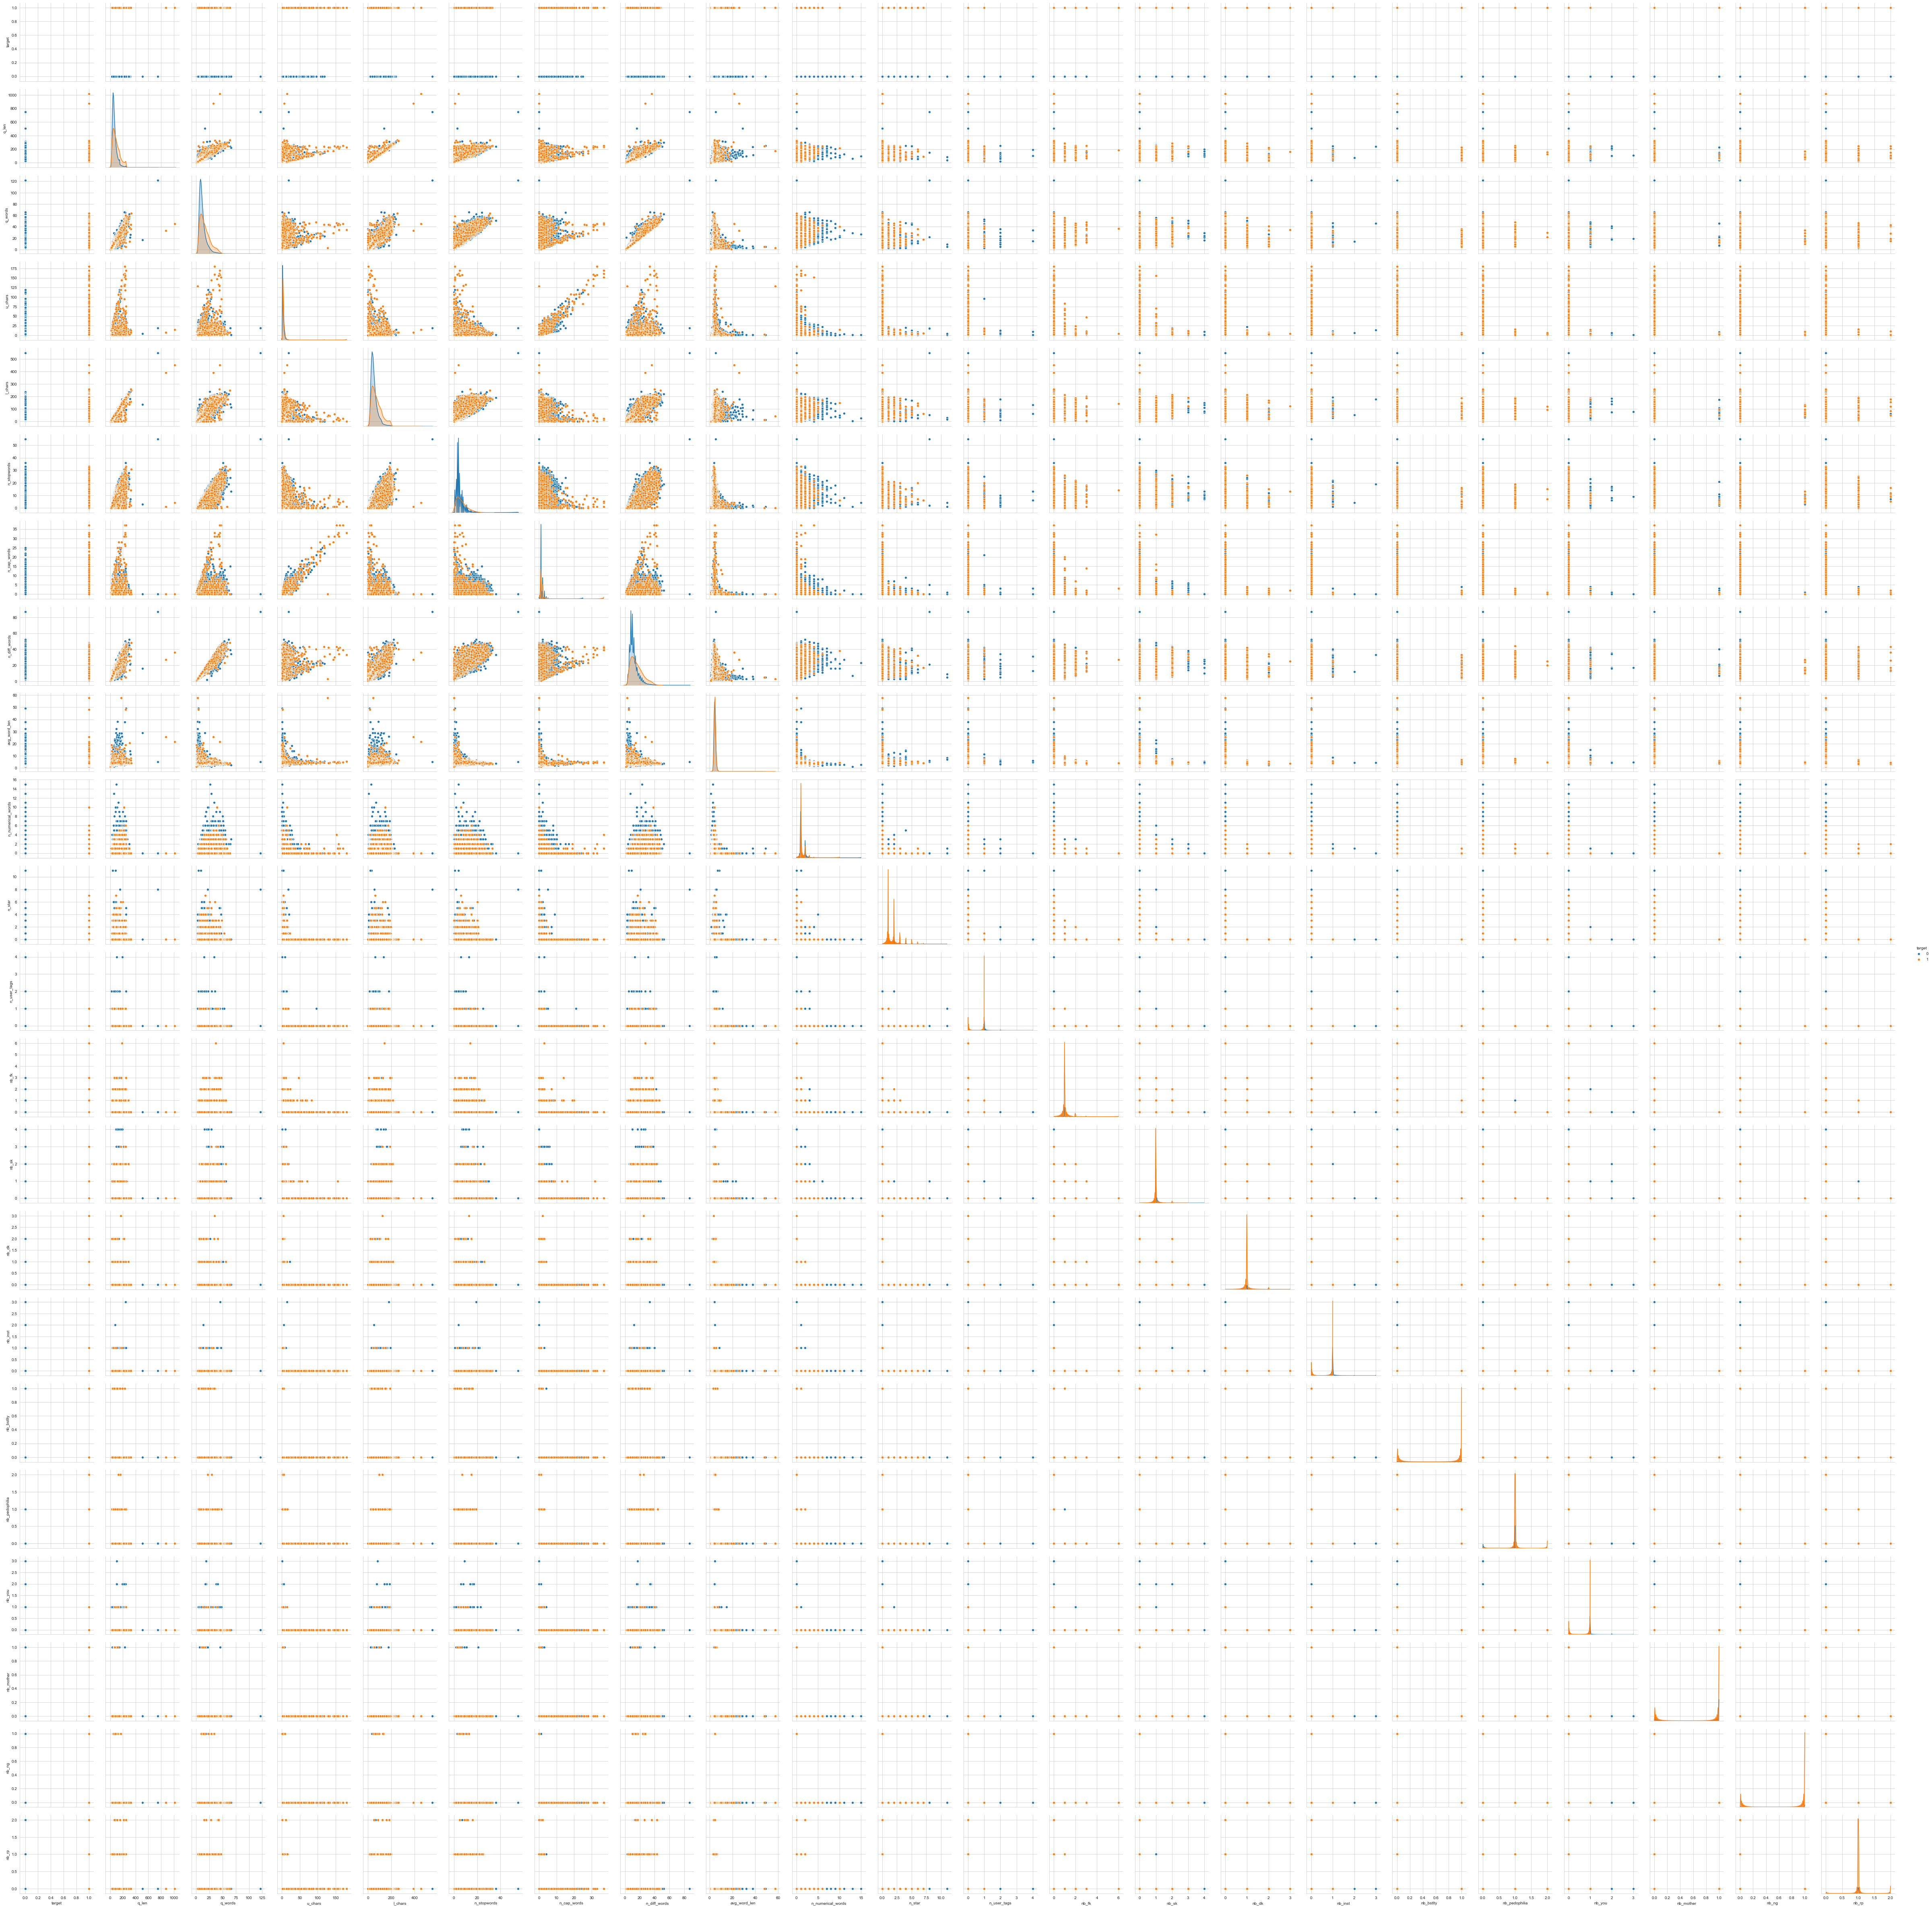

In [183]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages:
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(temp_data, hue="target", size=3);
plt.show()

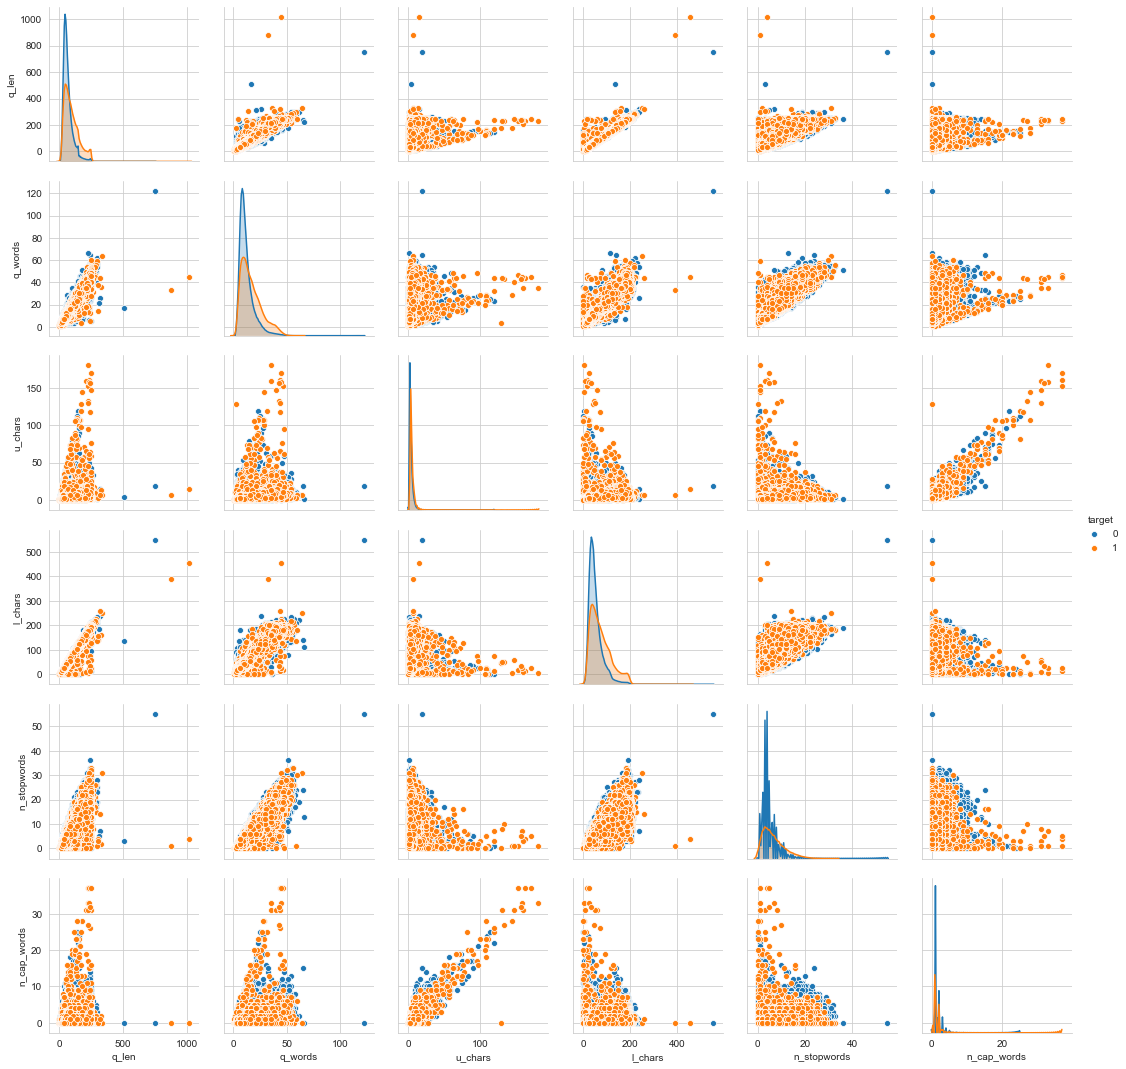

In [217]:
n = data.shape[0]
sns.pairplot(data[['q_len', 'q_words', 'u_chars','l_chars', 'n_stopwords', 'n_cap_words', 'target']][0:n], hue='target', vars=['q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words'])
plt.show()

- Preprocessing:
    Data points are not well sepated on the qiven points. It may be because of highly imbalance of data.

#### Question number of words Analysis

In [133]:
data['q_words'].describe()

count    1.306122e+06
mean     1.280350e+01
std      7.052138e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.220000e+02
Name: q_words, dtype: float64

In [77]:
# Maximum word in the question 
print ("Maximum words in the question:",data['q_words'].max())
print ("Minimum words in the question:",data['q_words'].min())

Maximum words in the question: 122
Minimum words in the question: 1


In [117]:
data['q_words'].value_counts()

9      124196
8      122459
10     116193
7      104838
11     100558
        ...  
60          1
62          1
64          1
65          1
122         1
Name: q_words, Length: 65, dtype: int64

Text(0, 0.5, 'Number of times legnth')

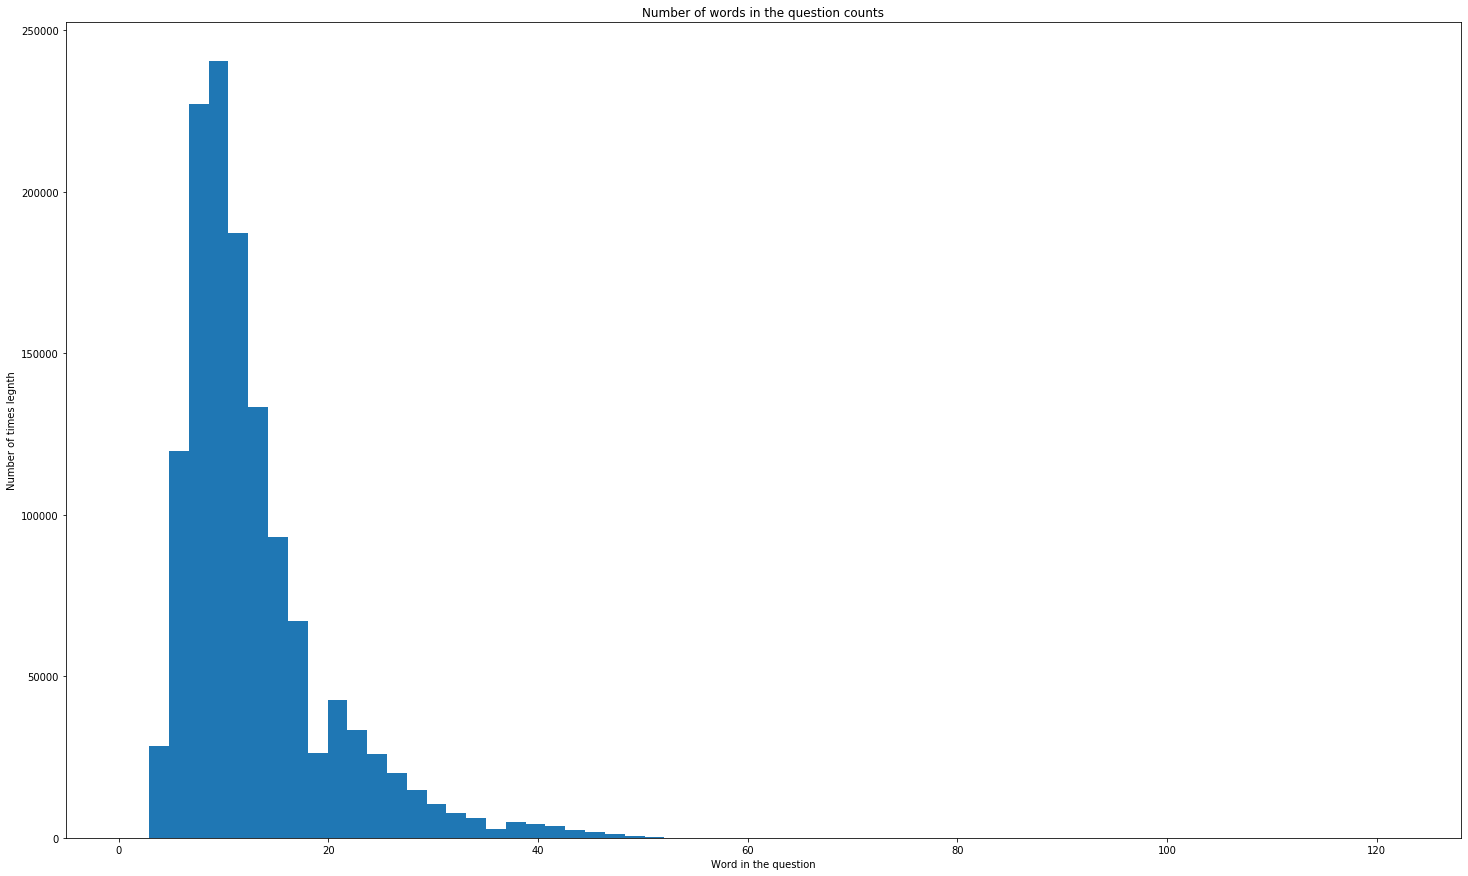

In [129]:
plt.figure(figsize=(25, 15))

plt.hist(data['q_words'], bins=64)

plt.title('Number of words in the question counts')
plt.xlabel('Word in the question')
plt.ylabel('Number of times legnth')

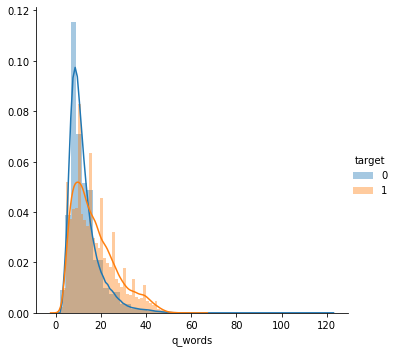

In [144]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'q_words')\
   .add_legend()
plt.show()

#### Question Length Analysis

In [132]:
data['q_len'].describe()

count    1.306122e+06
mean     7.067884e+01
std      3.878428e+01
min      1.000000e+00
25%      4.500000e+01
50%      6.000000e+01
75%      8.500000e+01
max      1.017000e+03
Name: q_len, dtype: float64

In [128]:
# Maximum word in the question 
print ("Maximum words in the question:",data['q_len'].max())
print ("Minimum words in the question:",data['q_len'].min())

Maximum words in the question: 1017
Minimum words in the question: 1


Text(0, 0.5, 'Number of times legnth')

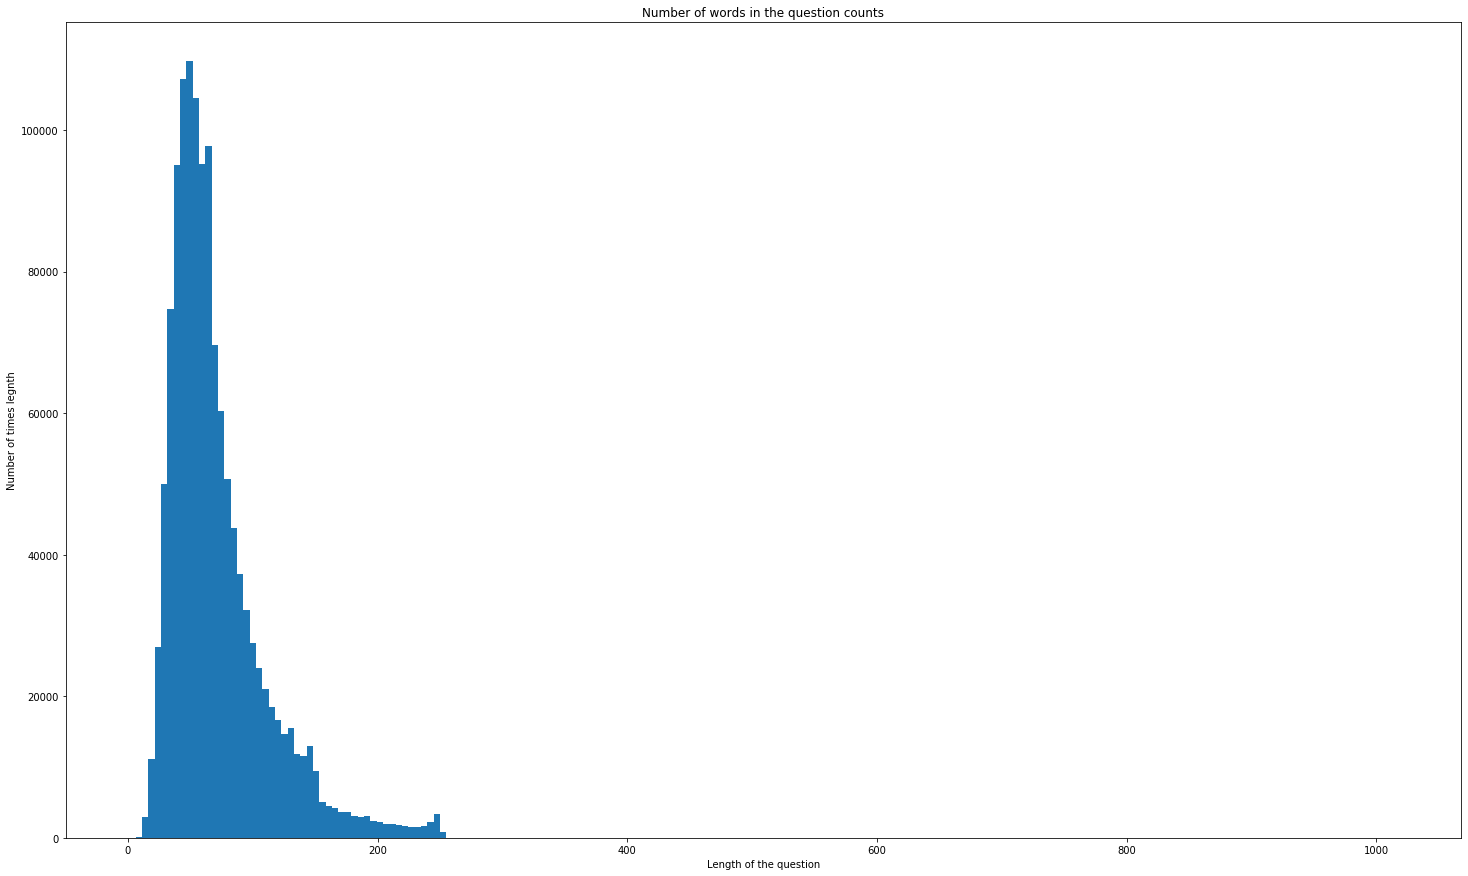

In [131]:
plt.figure(figsize=(25, 15))

plt.hist(data['q_len'], bins=200)

#plt.yscale('log', nonposy='clip')

plt.title('Number of words in the question counts')

plt.xlabel('Length of the question')

plt.ylabel('Number of times legnth')

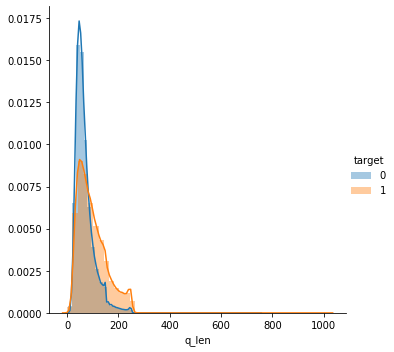

In [143]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'q_len')\
   .add_legend()
plt.show()


#### Univariate Analysis

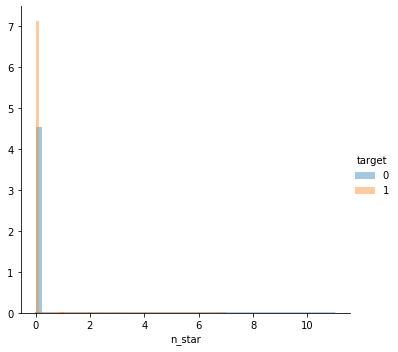

In [145]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_star')\
   .add_legend()
plt.show()

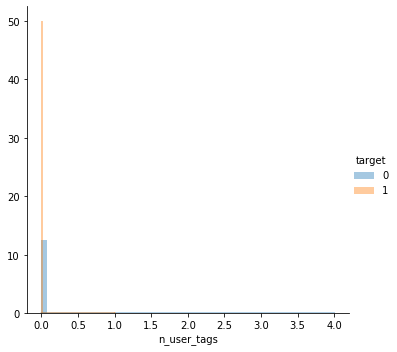

In [146]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_user_tags')\
   .add_legend()
plt.show()

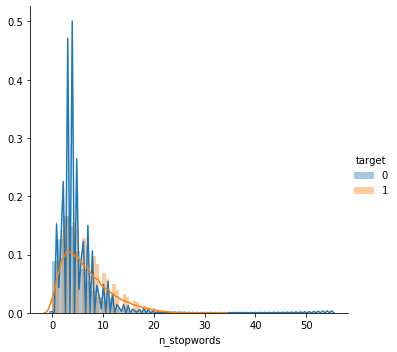

In [148]:
#n_stopwords
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_stopwords')\
   .add_legend()
plt.show()

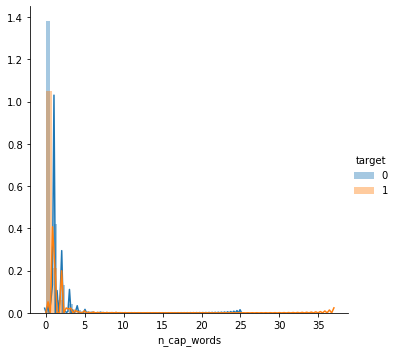

In [149]:
# n_cap_words
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'n_cap_words')\
   .add_legend()
plt.show()


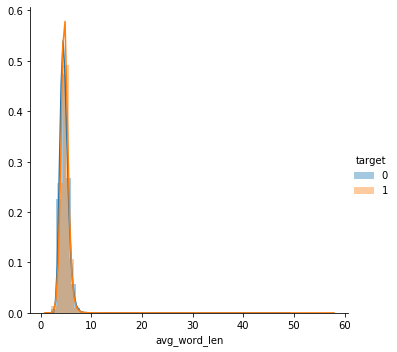

In [150]:
sns.FacetGrid(data, hue='target', size=5)\
   .map(sns.distplot, 'avg_word_len')\
   .add_legend()
plt.show()


In [188]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_star', 'n_user_tags', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

In [207]:
print (max(data['nb_rp']))

2


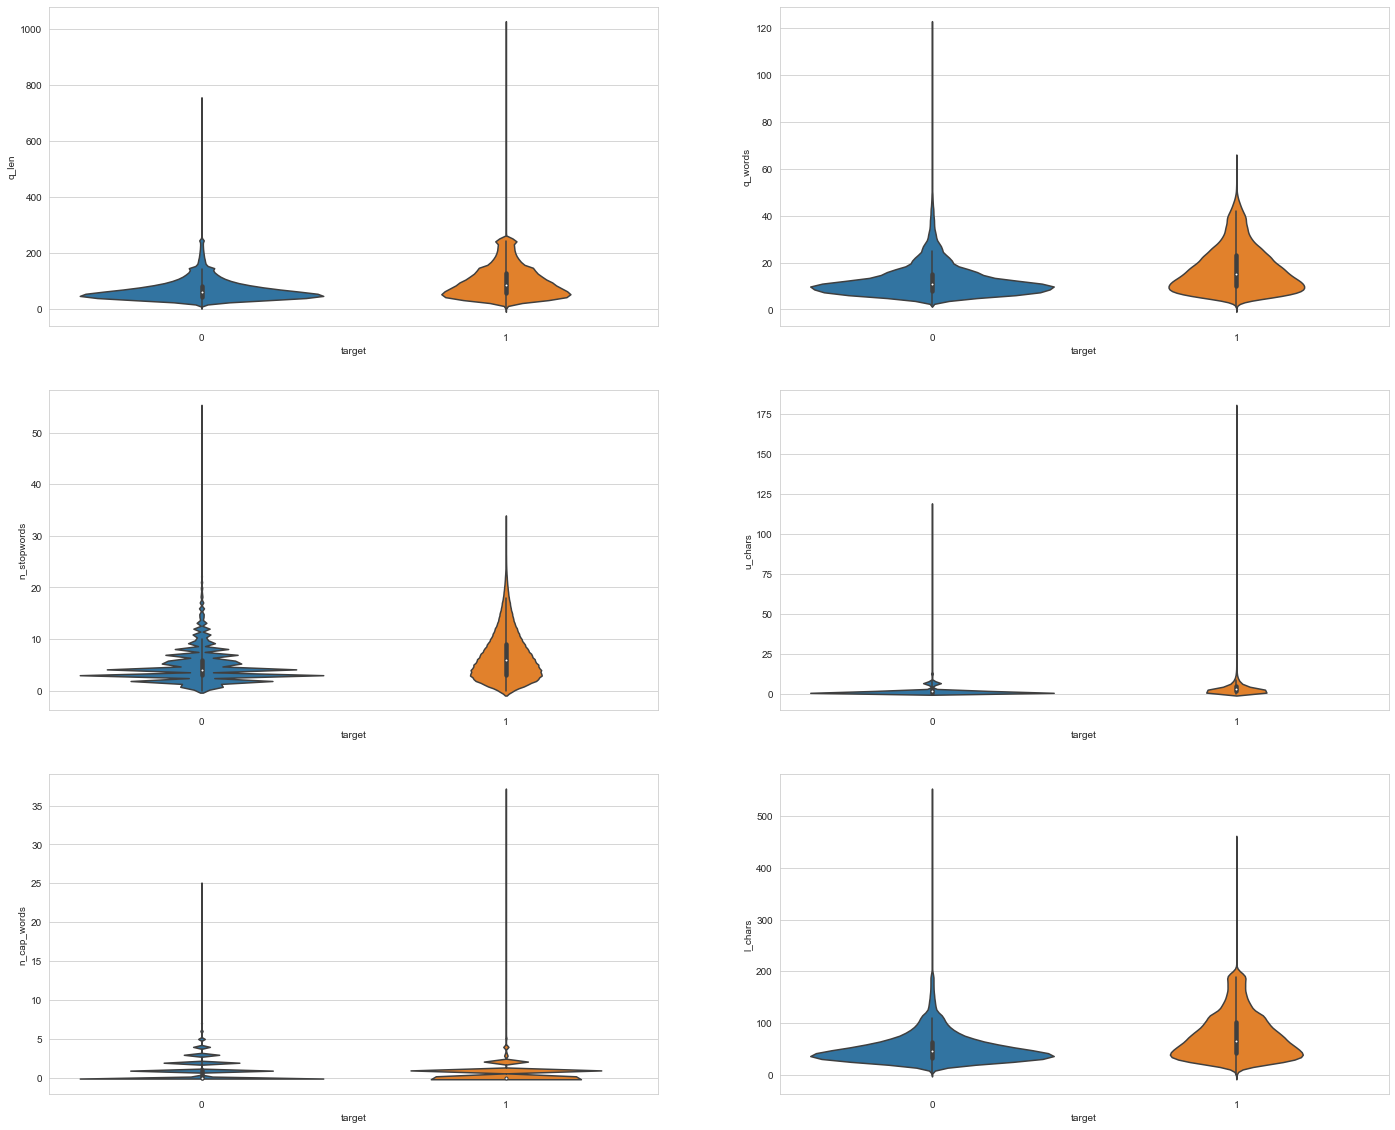

In [213]:
plt.figure(figsize=(24, 20))
plt.subplot(3,2,1)
sns.violinplot(x='target', y='q_len', data= data)
plt.subplot(3,2,2)
sns.violinplot(x='target', y='q_words', data= data)
plt.subplot(3,2,3)
sns.violinplot(x='target', y='n_stopwords', data= data)
plt.subplot(3,2,4)
sns.violinplot(x='target', y='u_chars', data= data)

plt.subplot(3,2,5)
sns.violinplot(x='target', y='n_cap_words', data= data)
plt.subplot(3,2,6)
sns.violinplot(x='target', y='l_chars', data= data)

plt.show()

### Visualization

In [28]:
temp_data.head()

target  q_len  q_words  u_chars  l_chars  n_stopwords  n_cap_words  \
0       0     72       13        2       53            6            0   
1       0     81       16        1       63            8            0   
2       0     67       10        2       54            1            0   
3       0     57        9        4       44            2            0   
4       0     77       15        3       59            5            2   

   n_diff_words  avg_word_len  n_numerical_words  ...  nb_fk  nb_sk  nb_dk  \
0            13      4.615385                  0  ...      0      0      0   
1            15      4.125000                  0  ...      0      0      0   
2             8      5.800000                  0  ...      0      0      0   
3             9      5.444444                  0  ...      0      0      0   
4            15      4.200000                  0  ...      0      0      0   

   nb_inst  nb_bstlty  nb_pedophilia  nb_you  nb_mother  nb_ng  nb_rp  
0        0          0              0       0          0      0      0  
1        0          0              0       0          0      0      0  
2        0          0              0       0          0      0      0  
3        0          0              0       0          0      0      0  
4        0          0              0       0          0      0      0  

[5 rows x 22 columns]

In [32]:
temp_data[1:]

target  q_len  q_words  u_chars  l_chars  n_stopwords  n_cap_words  \
1             0     81       16        1       63            8            0   
2             0     67       10        2       54            1            0   
3             0     57        9        4       44            2            0   
4             0     77       15        3       59            5            2   
5             0     72       10        6       55            2            0   
...         ...    ...      ...      ...      ...          ...          ...   
1306117       0     93       17        1       73            8            0   
1306118       0     91       19       12       60            7            4   
1306119       0     25        4        1       20            0            0   
1306120       0     71       13        3       55            4            1   
1306121       0     52       11        3       38            6            0   

         n_diff_words  avg_word_len  n_numerical_words  ...  nb_fk  nb_sk  \
1                  15      4.125000                  0  ...      0      0   
2                   8      5.800000                  0  ...      0      0   
3                   9      5.444444                  0  ...      0      0   
4                  15      4.200000                  0  ...      0      0   
5                  10      6.300000                  0  ...      0      0   
...               ...           ...                ...  ...    ...    ...   
1306117            16      4.529412                  0  ...      0      0   
1306118            18      3.842105                  0  ...      0      0   
1306119             4      5.500000                  0  ...      0      0   
1306120            13      4.538462                  0  ...      0      0   
1306121             9      3.818182                  0  ...      0      0   

         nb_dk  nb_inst  nb_bstlty  nb_pedophilia  nb_you  nb_mother  nb_ng  \
1            0        0          0              0       0          0      0   
2            0        0          0              0       0          0      0   
3            0        0          0              0       0          0      0   
4            0        0          0              0       0          0      0   
5            0        0          0              0       0          0      0   
...        ...      ...        ...            ...     ...        ...    ...   
1306117      0        0          0              0       0          0      0   
1306118      0        0          0              0       0          0      0   
1306119      0        0          0              0       0          0      0   
1306120      0        0          0              0       0          0      0   
1306121      0        0          0              0       0          0      0   

         nb_rp  
1            0  
2            0  
3            0  
4            0  
5            0  
...        ...  
1306117      0  
1306118      0  
1306119      0  
1306120      0  
1306121      0  

[1306121 rows x 22 columns]

In [35]:
temp_data.columns

Index(['target', 'q_len', 'q_words', 'u_chars', 'l_chars', 'n_stopwords',
       'n_cap_words', 'n_diff_words', 'avg_word_len', 'n_numerical_words',
       'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk', 'nb_inst',
       'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng', 'nb_rp'],
      dtype='object')

In [74]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler


X = MinMaxScaler().fit_transform(temp_data[['q_len', 'q_words', 'u_chars', 'l_chars', 'n_stopwords',
       'n_cap_words', 'n_diff_words', 'avg_word_len', 'n_numerical_words',
       'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk', 'nb_inst',
       'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng', 'nb_rp']])
y = temp_data['target'].values

In [40]:

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1306122 samples in 4186.439s...
[t-SNE] Computed neighbors for 1306122 samples in 18224.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1306122
[t-SNE] Computed conditional probabilities for sample 2000 / 1306122
[t-SNE] Computed conditional probabilities for sample 3000 / 1306122
[t-SNE] Computed conditional probabilities for sample 4000 / 1306122
[t-SNE] Computed conditional probabilities for sample 5000 / 1306122
[t-SNE] Computed conditional probabilities for sample 6000 / 1306122
[t-SNE] Computed conditional probabilities for sample 7000 / 1306122
[t-SNE] Computed conditional probabilities for sample 8000 / 1306122
[t-SNE] Computed conditional probabilities for sample 9000 / 1306122
[t-SNE] Computed conditional probabilities for sample 10000 / 1306122
[t-SNE] Computed conditional probabilities for sample 11000 / 1306122
[t-SNE] Computed conditional probabilities for sample 12000 / 1306122
[t-SNE] Compute

[t-SNE] Computed conditional probabilities for sample 230000 / 1306122
[t-SNE] Computed conditional probabilities for sample 231000 / 1306122
[t-SNE] Computed conditional probabilities for sample 232000 / 1306122
[t-SNE] Computed conditional probabilities for sample 233000 / 1306122
[t-SNE] Computed conditional probabilities for sample 234000 / 1306122
[t-SNE] Computed conditional probabilities for sample 235000 / 1306122
[t-SNE] Computed conditional probabilities for sample 236000 / 1306122
[t-SNE] Computed conditional probabilities for sample 237000 / 1306122
[t-SNE] Computed conditional probabilities for sample 238000 / 1306122
[t-SNE] Computed conditional probabilities for sample 239000 / 1306122
[t-SNE] Computed conditional probabilities for sample 240000 / 1306122
[t-SNE] Computed conditional probabilities for sample 241000 / 1306122
[t-SNE] Computed conditional probabilities for sample 242000 / 1306122
[t-SNE] Computed conditional probabilities for sample 243000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 460000 / 1306122
[t-SNE] Computed conditional probabilities for sample 461000 / 1306122
[t-SNE] Computed conditional probabilities for sample 462000 / 1306122
[t-SNE] Computed conditional probabilities for sample 463000 / 1306122
[t-SNE] Computed conditional probabilities for sample 464000 / 1306122
[t-SNE] Computed conditional probabilities for sample 465000 / 1306122
[t-SNE] Computed conditional probabilities for sample 466000 / 1306122
[t-SNE] Computed conditional probabilities for sample 467000 / 1306122
[t-SNE] Computed conditional probabilities for sample 468000 / 1306122
[t-SNE] Computed conditional probabilities for sample 469000 / 1306122
[t-SNE] Computed conditional probabilities for sample 470000 / 1306122
[t-SNE] Computed conditional probabilities for sample 471000 / 1306122
[t-SNE] Computed conditional probabilities for sample 472000 / 1306122
[t-SNE] Computed conditional probabilities for sample 473000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 690000 / 1306122
[t-SNE] Computed conditional probabilities for sample 691000 / 1306122
[t-SNE] Computed conditional probabilities for sample 692000 / 1306122
[t-SNE] Computed conditional probabilities for sample 693000 / 1306122
[t-SNE] Computed conditional probabilities for sample 694000 / 1306122
[t-SNE] Computed conditional probabilities for sample 695000 / 1306122
[t-SNE] Computed conditional probabilities for sample 696000 / 1306122
[t-SNE] Computed conditional probabilities for sample 697000 / 1306122
[t-SNE] Computed conditional probabilities for sample 698000 / 1306122
[t-SNE] Computed conditional probabilities for sample 699000 / 1306122
[t-SNE] Computed conditional probabilities for sample 700000 / 1306122
[t-SNE] Computed conditional probabilities for sample 701000 / 1306122
[t-SNE] Computed conditional probabilities for sample 702000 / 1306122
[t-SNE] Computed conditional probabilities for sample 703000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 920000 / 1306122
[t-SNE] Computed conditional probabilities for sample 921000 / 1306122
[t-SNE] Computed conditional probabilities for sample 922000 / 1306122
[t-SNE] Computed conditional probabilities for sample 923000 / 1306122
[t-SNE] Computed conditional probabilities for sample 924000 / 1306122
[t-SNE] Computed conditional probabilities for sample 925000 / 1306122
[t-SNE] Computed conditional probabilities for sample 926000 / 1306122
[t-SNE] Computed conditional probabilities for sample 927000 / 1306122
[t-SNE] Computed conditional probabilities for sample 928000 / 1306122
[t-SNE] Computed conditional probabilities for sample 929000 / 1306122
[t-SNE] Computed conditional probabilities for sample 930000 / 1306122
[t-SNE] Computed conditional probabilities for sample 931000 / 1306122
[t-SNE] Computed conditional probabilities for sample 932000 / 1306122
[t-SNE] Computed conditional probabilities for sample 933000 / 1306122
[t-SNE

[t-SNE] Computed conditional probabilities for sample 1147000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1148000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1149000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1150000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1151000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1152000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1153000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1154000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1155000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1156000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1157000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1158000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1159000 / 1306122
[t-SNE] Computed conditional probabilities for sample 1160000 / 

<Figure size 2520x1800 with 0 Axes>

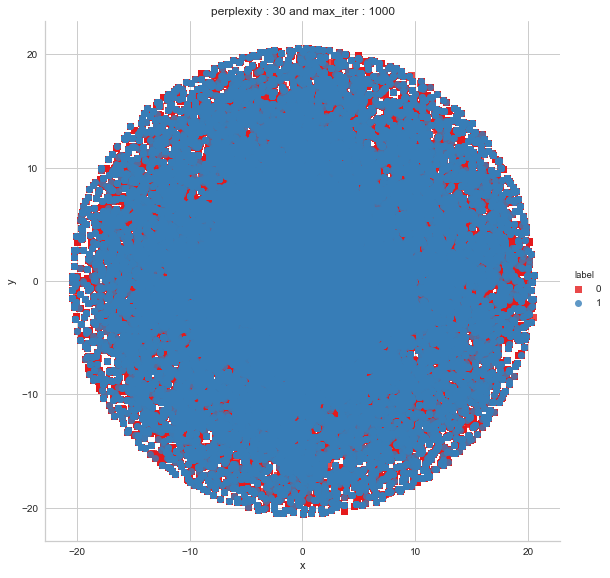

In [44]:
plt.figure(figsize=(35, 25))
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

### Preprocessing of text:
- Preprocessing:
    - Removing html tags 
    - Removing Punctutions
    - Cleanig Abbrevations
    - Correcting Spellings
    - Clean Lowercase
    - Clean Unicode
    - Clean math
    - Clean Language
    - Clean space
    - Clean bad-case words
    - Clean spaces
    - Expanding Contraction
    - Clean repeated word
    - Check oov[out of Vocabulary] words
    - Remove STOP-WORDS
    

In [56]:
# https://www.kaggle.com/kentaronakanishi/18th-place-solution
puncts = [
    ',', '.', '"', ':', ')', '(', '-', '!', '?','|', ';', "'", '$', '&',
    '/', '[', ']', '%', '=', '#', '*', '+', '\\', '•', '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '¬', '░', '¶', '↑', '±',  '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '₹', '´'
]

In [57]:
abbreviations = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "here's": "here is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "who'd": "who would",
    "who're": "who are",
    "'re": " are",
    "tryin'": "trying",
    "doesn'": "does not",
    'howdo': 'how do',
    'whatare': 'what are',
    'howcan': 'how can',
    'howmuch': 'how much',
    'howmany': 'how many',
    'whydo': 'why do',
    'doI': 'do I',
    'theBest': 'the best',
    'howdoes': 'how does',
}


In [58]:
spells = {
    'colour': 'color',
    'centre': 'center',
    'favourite': 'favorite',
    'travelling': 'traveling',
    'counselling': 'counseling',
    'theatre': 'theater',
    'cancelled': 'canceled',
    'labour': 'labor',
    'organisation': 'organization',
    'wwii': 'world war 2',
    'citicise': 'criticize',
    'youtu.be': 'youtube',
    'youtu ': 'youtube ',
    'qoura': 'quora',
    'sallary': 'salary',
    'Whta': 'what',
    'whta': 'what',
    'narcisist': 'narcissist',
    'mastrubation': 'masturbation',
    'mastrubate': 'masturbate',
    "mastrubating": 'masturbating',
    'pennis': 'penis',
    'Etherium': 'ethereum',
    'etherium': 'ethereum',
    'narcissit': 'narcissist',
    'bigdata': 'big data',
    '2k17': '2017',
    '2k18': '2018',
    '2k19': '2020',
    'qouta': 'quota',
    'exboyfriend': 'ex boyfriend',
    'exgirlfriend': 'ex girlfriend',
    'airhostess': 'air hostess',
    'whst': 'what',
    'watsapp': 'whatsapp',
    'demonitisation': 'demonetization',
    'demonitization': 'demonetization',
    'demonetisation': 'demonetization',
    'quorans': 'quora user',
    'quoran': 'quora user',
    'pokémon': 'pokemon',
    'bacteries': 'batteries', 
    'yr old': 'years old',
}

codes = ['\x7f', '\u200b', '\xa0', '\ufeff', '\u200e', '\u202a', '\u202c', '\u2060', '\uf0d8', '\ue019', '\uf02d', '\u200f', '\u2061', '\ue01b']


langs1 = r'[\p{Katakana}\p{Hiragana}\p{Han}]' # regex
langs2 = r'[ஆய்தஎழுத்துஆயுதஎழுத்துशुषछछशुषدوउसशुष북한내제តើបងប្អូនមានមធ្យបាយអ្វីខ្លះដើម្បីរកឃើញឯកសារអំពីប្រវត្តិស្ត្រនៃប្រាសាទអង្គរវट्टरौरआदસંઘરાજ્યपीतऊनअहএকটিবাড়িএকটিখামারএরঅধীনেপদেরবাছাইপরীক্ষাএরপ্রশ্নওউত্তরসহকোথায়পেতেপারিص、。Емелядуракلكلمقاممقال수능ί서로가를행복하게기乡국고등학교는몇시간업니《》싱관없어나이रचा키کپڤ」मिलगईकलेजेकोठंडकऋॠऌॡर]'
compiled_langs1 = regex.compile(langs1)
compiled_langs2 = re.compile(langs2)


In [59]:
def _clean_math(x, compiled_re):
    return compiled_re.sub(' <math> ', x)

In [60]:
def preprocess(x):
    
    x = str(x).lower()
    return x
    
def _clean_unicode(x):
    for u in codes:
        if u in x:
            x = x.replace(u, '')
    return x

def clean_math(df):
    math_puncts = 'θπα÷⁴≠β²¾∫≥⇒¬∠＝∑Φ√½¼'
    math_puncts_long = [r'\\frac', r'\[math\]', r'\[/math\]', r'\\lim']
    compiled_math = re.compile('(%s)' % '|'.join(math_puncts))
    compiled_math_long = re.compile('(%s)' % '|'.join(math_puncts_long))
    df['question_text'] = df['question_text'].apply(lambda x: _clean_math(x, compiled_math_long))
    df['question_text'] = df['question_text'].apply(lambda x: _clean_math(x, compiled_math))
    return df

def clean_abbreviation(df, abbreviations):
    compiled_abbreviation = re.compile('(%s)' % '|'.join(abbreviations.keys()))
    #print (compiled_abbreviation)
    def replace(match):
        return abbreviations[match.group(0)]
    df['question_text'] = df["question_text"].apply(
        lambda x: _clean_abreviation(x, compiled_abbreviation, replace)
    )
    return df

def _clean_abreviation(x, compiled_re, replace):
    return compiled_re.sub(replace, x)


def clean_spells(df, spells):
    compiled_spells = re.compile('(%s)' % '|'.join(spells.keys()))
    def replace(match):
        return spells[match.group(0)]
    df['question_text'] = df["question_text"].apply(
        lambda x: _clean_spells(x, compiled_spells, replace)
    )
    return df
    
def _clean_spells(x, compiled_re, replace):
    return compiled_re.sub(replace, x)

def _clean_language(x, compiled_re):
    return compiled_re.sub(' <lang> ', x)


def _clean_puncts(x, puncts):
    x = str(x)
    # added space around puncts after replace
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x


def _clean_space(x, compiled_re):
    return compiled_re.sub(" ", x)
    

In [61]:
data.shape

(700000, 24)

In [72]:
if os.path.isfile('data_after_preprocessing7l.csv'):
    data = pd.read_csv('data_after_preprocessing7l.csv')
else:
    data["question_text"] = data["question_text"].fillna("").apply(preprocess)
    data["question_text"] = data["question_text"].fillna("").apply(_clean_unicode)
    data = clean_math(data)
    data = clean_abbreviation(data, abbreviations)
    data = clean_spells(data, spells)
    data['question_text'] = data['question_text'].apply(lambda x: _clean_language(x, compiled_langs1))
    data['question_text'] = data['question_text'].apply(lambda x: _clean_language(x, compiled_langs2))
    data['question_text'] = data['question_text'].apply(lambda x: _clean_puncts(x, puncts))
    compiled_re = re.compile(r"\s+")
    data['question_text'] = data["question_text"].apply(lambda x: _clean_space(x, compiled_re))
    data.to_csv('data_after_preprocessing7l.csv', index=False)
    
data.head()

qid                                      question_text  \
0  00002165364db923c7e6  how did quebec nationalists see their province...   
1  000032939017120e6e44  do you have an adopted dog , how would you enc...   
2  0000412ca6e4628ce2cf  why does velocity affect time ? does velocity ...   
3  000042bf85aa498cd78e  how did otto von guericke used the magdeburg h...   
4  0000455dfa3e01eae3af  can i convert montra helicon d to a mountain b...   

   target  q_len  q_words  u_chars  l_chars  n_stopwords  n_cap_words  \
0       0     72       13        2       53            6            0   
1       0     81       16        1       63            8            0   
2       0     67       10        2       54            1            0   
3       0     57        9        4       44            2            0   
4       0     77       15        3       59            5            2   

   n_diff_words  ...  nb_fk  nb_sk  nb_dk  nb_inst  nb_bstlty  nb_pedophilia  \
0            13  ...      0      0      0        0          0              0   
1            15  ...      0      0      0        0          0              0   
2             8  ...      0      0      0        0          0              0   
3             9  ...      0      0      0        0          0              0   
4            15  ...      0      0      0        0          0              0   

   nb_you  nb_mother  nb_ng  nb_rp  
0       0          0      0      0  
1       0          0      0      0  
2       0          0      0      0  
3       0          0      0      0  
4       0          0      0      0  

[5 rows x 24 columns]

In [22]:
data.shape

(700000, 24)

In [64]:
data['question_text']

0         how did quebec nationalists see their province...
1         do you have an adopted dog , how would you enc...
2         why does velocity affect time ? does velocity ...
3         how did otto von guericke used the magdeburg h...
4         can i convert montra helicon d to a mountain b...
                                ...                        
699995                 who did the knights pay taxes too ? 
699996    a and m had some money in the ratio 3 : 7 . af...
699997    why do some candidates enter mckinsey without ...
699998         where was the ark of noah after the flood ? 
699999    what are a few examples of advertisements / co...
Name: question_text, Length: 700000, dtype: object

In [18]:
data.shape[0] - np.sum(data.target)

938210

### Text Vectorization 

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(data['question_text'])
tfidf_question_text = vectorizer.transform(data['question_text'])

print("Shape of matrix after Tfidf encodig ",tfidf_question_text.shape)

Shape of matrix after Tfidf encodig  (700000, 20000)


TFIDF vector TSNE Visualization only text data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


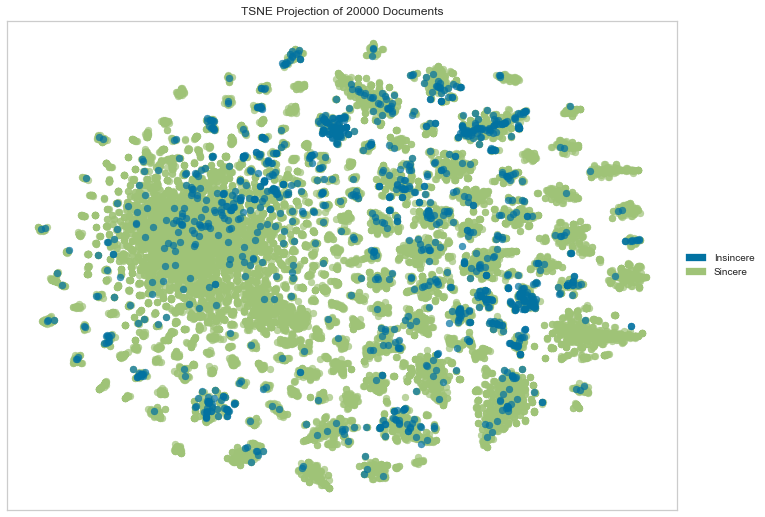

In [61]:
# 
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
n = 20000
target_names = ["Sincere","Insincere"]
tsne.fit(tfidf_question_text[:n], data.target[:n].map({1: target_names[1],0:target_names[0]}))
tsne.show()


In [ ]:
# Some clusters form but data is well seperated

In [67]:
from scipy.sparse import hstack
temp2 = hstack((temp_data, tfidf_question_text)).tocsr()

print (temp2.shape)
print (tfidf_question_text.shape)

(1306122, 20022)
(1306122, 20000)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


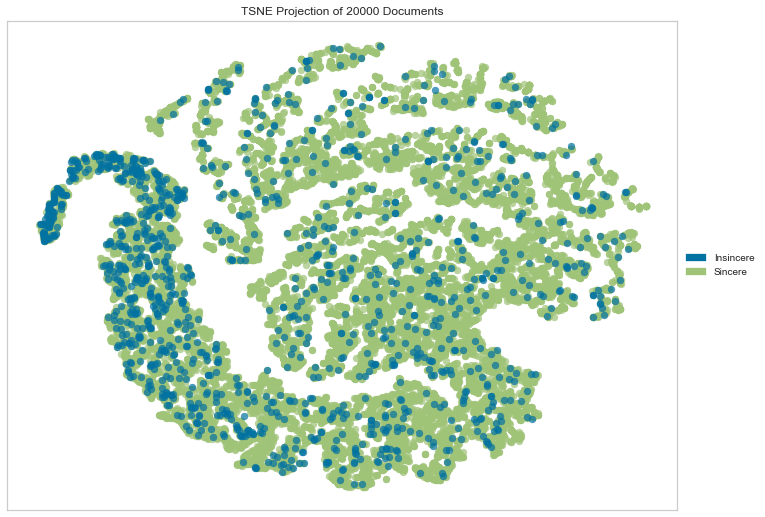

In [68]:
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
n = 20000

tsne.fit(temp2[:n], data.target[:n].map({1: target_names[1],0:target_names[0]}))
tsne.show()

In [ ]:
# Some clusers asr form but not well seperated

### Train Test split 70:20

In [65]:
data.columns

Index(['qid', 'question_text', 'target', 'q_len', 'q_words', 'u_chars',
       'l_chars', 'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp'],
      dtype='object')

In [75]:
y = data.target
X = data.drop(['qid', 'target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 40, stratify= y)
print (X_train.shape)
print (X_test.shape)
print (y.shape)
X_train.head()

(560000, 22)
(140000, 22)
(700000,)


question_text  q_len  q_words  \
654544                     what is proforma in college ?      28        5   
685253  what does rx stand for in the prescription & p...     54       10   
368074  manitoba canada super visa benefits ? differen...    103       14   
435388  what are some non military jobs that need nerv...     58       11   
266632  how might i best utilise a small garden to dra...     86       15   

        u_chars  l_chars  n_stopwords  n_cap_words  n_diff_words  \
654544        1       22            2            0             5   
685253        2       41            4            0            10   
368074        2       87            2            0            11   
435388        1       46            4            0            11   
266632        2       69            4            1            15   

        avg_word_len  n_numerical_words  ...  nb_fk  nb_sk  nb_dk  nb_inst  \
654544      4.800000                  0  ...      0      0      0        0   
685253      4.500000                  0  ...      0      0      0        0   
368074      6.428571                  0  ...      0      0      0        0   
435388      4.363636                  0  ...      0      0      0        0   
266632      4.800000                  0  ...      0      0      0        0   

        nb_bstlty  nb_pedophilia  nb_you  nb_mother  nb_ng  nb_rp  
654544          0              0       0          0      0      0  
685253          0              0       0          0      0      0  
368074          0              0       0          0      0      0  
435388          0              0       0          0      0      0  
266632          0              0       0          0      0      0  

[5 rows x 22 columns]

In [76]:
# https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

col_names = ['q_len', 'q_words', 'u_chars', 'l_chars',
       'n_stopwords', 'n_cap_words', 'n_diff_words', 'avg_word_len',
       'n_numerical_words', 'n_user_tags', 'n_star', 'nb_fk', 'nb_sk', 'nb_dk',
       'nb_inst', 'nb_bstlty', 'nb_pedophilia', 'nb_you', 'nb_mother', 'nb_ng',
       'nb_rp']

train_features = X_train[col_names]
test_features = X_test[col_names]
scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)
test_features = scaler.transform(test_features.values)

X_train[col_names] = train_features
X_test[col_names] = test_features
X_train.head()

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

question_text     q_len   q_words  \
654544                     what is proforma in college ?  -1.099143 -1.105540   
685253  what does rx stand for in the prescription & p... -0.429010 -0.396704   
368074  manitoba canada super visa benefits ? differen...  0.833933  0.170364   
435388  what are some non military jobs that need nerv... -0.325913 -0.254937   
266632  how might i best utilise a small garden to dra...  0.395769  0.312131   

         u_chars   l_chars  n_stopwords  n_cap_words  n_diff_words  \
654544 -0.720037 -1.051183    -0.833908    -0.529686     -1.180269   
685253 -0.332374 -0.424052    -0.254607    -0.529686     -0.352598   
368074 -0.332374  1.094267    -0.833908    -0.529686     -0.187064   
435388 -0.720037 -0.259017    -0.254607    -0.529686     -0.187064   
266632 -0.332374  0.500142    -0.254607     0.647904      0.475073   

        avg_word_len  n_numerical_words  ...     nb_fk    nb_sk     nb_dk  \
654544      0.158884           -0.21639  ... -0.040681 -0.09659 -0.021589   
685253     -0.208573           -0.21639  ... -0.040681 -0.09659 -0.021589   
368074      2.153649           -0.21639  ... -0.040681 -0.09659 -0.021589   
435388     -0.375599           -0.21639  ... -0.040681 -0.09659 -0.021589   
266632      0.158884           -0.21639  ... -0.040681 -0.09659 -0.021589   

         nb_inst  nb_bstlty  nb_pedophilia    nb_you  nb_mother     nb_ng  \
654544 -0.009637  -0.004818      -0.008566 -0.009643  -0.003381 -0.002673   
685253 -0.009637  -0.004818      -0.008566 -0.009643  -0.003381 -0.002673   
368074 -0.009637  -0.004818      -0.008566 -0.009643  -0.003381 -0.002673   
435388 -0.009637  -0.004818      -0.008566 -0.009643  -0.003381 -0.002673   
266632 -0.009637  -0.004818      -0.008566 -0.009643  -0.003381 -0.002673   

           nb_rp  
654544 -0.015122  
685253 -0.015122  
368074 -0.015122  
435388 -0.015122  
266632 -0.015122  

[5 rows x 22 columns]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), min_df=1e-4, token_pattern=r'\w+',analyzer='char')
vectorizer.fit(X_train['question_text'])
x_train_vector = vectorizer.transform(X_train['question_text'])
x_test_vector = vectorizer.transform(X_test['question_text'])


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(X_train['question_text'])
x_train_vector = vectorizer.transform(X_train['question_text'])
x_test_vector = vectorizer.transform(X_test['question_text'])


In [78]:
x_test_vector.shape

(140000, 20000)

In [79]:
x_train_vector

<560000x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 3274741 stored elements in Compressed Sparse Row format>

In [80]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    sns.set(font_scale=1.8)
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    print ("**** Confusion Matrix ******")
    print (C)
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print ("**** Precision Matrix ******")
    print (B)
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print ("**** Recall Matrix ******")
    print (A)
    
    plt.show()

In [81]:
print (len(y_test))
print ("Test 1label Percentage:",sum(y_test)/len(y_test) * 100 )

140000
Test 1label Percentage: 6.157142857142857



### TFIDF Learn Models

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words='english',
        min_df=10, 
        ngram_range=(1, 2),
        max_features=20000)
vectorizer.fit(X_train['question_text'])
X_train_tfidf = vectorizer.transform(X_train['question_text'])
X_test_tfidf = vectorizer.transform(X_test['question_text'])

print("Shape of matrix after Tfidf encodig ",X_train_tfidf.shape)
print("Shape of matrix after Tfidf encodig ",X_test_tfidf.shape)

Shape of matrix after Tfidf encodig  (560000, 20000)
Shape of matrix after Tfidf encodig  (140000, 20000)


In [38]:
from scipy.sparse import hstack
import pickle
X_train_TFIDF = hstack((X_train.drop(['question_text'], axis = 1), X_train_tfidf, x_train_vector)).tocsr()
X_test_TFIDF = hstack((X_test.drop(['question_text'], axis = 1), X_test_tfidf, x_test_vector)).tocsr()
 
print (X_train_TFIDF.shape)
print (X_test_TFIDF.shape)

(560000, 20102)
(140000, 20102)


In [39]:
# Hypter parameters in randomsearchcv https://www.appliedaicourse.com/course/applied-ai-course-online/
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
f1 = make_scorer(f1_score , average='macro')

##### Naive Bayes Model

In [89]:
from sklearn.naive_bayes import BernoulliNB

alpha = {'alpha':[10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]}

nb = BernoulliNB()
model = GridSearchCV(nb,alpha, scoring= 'f1')
model.fit(X_train_TFIDF, y_train)






c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'pr

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [90]:
model.best_score_

0.4537268190345104

In [91]:
model.best_params_

{'alpha': 0.01}

In [92]:
y_pred = model.predict(X_test_TFIDF)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (f1_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))

0.6959610144143205
0.44786085876232623
[[120010  11370]
 [  2852   5768]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94    131380
           1       0.34      0.67      0.45      8620

    accuracy                           0.90    140000
   macro avg       0.66      0.79      0.70    140000
weighted avg       0.94      0.90      0.91    140000



In [94]:
print (f1_score(y_test,y_pred) )

0.44786085876232623


**** Confusion Matrix ******
[[120010  11370]
 [  2852   5768]]
**** Precision Matrix ******
[[0.97678696 0.66343797]
 [0.02321304 0.33656203]]
**** Recall Matrix ******
[[0.91345715 0.08654285]
 [0.33085847 0.66914153]]


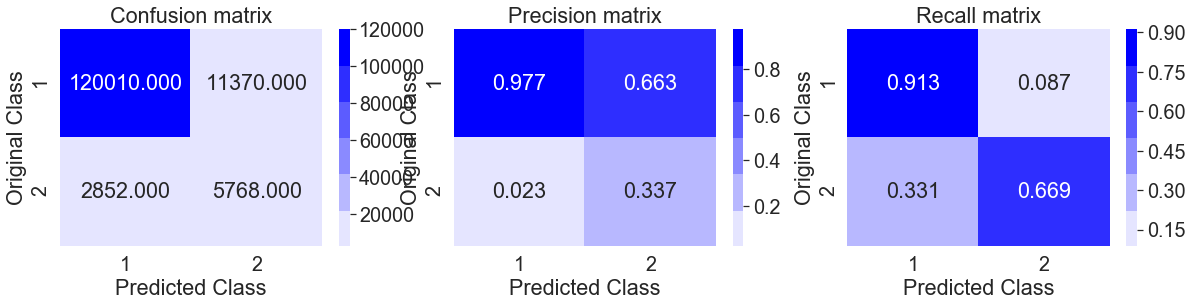

In [54]:
plot_confusion_matrix(y_test, y_pred)

### SVM Model

In [55]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs= 4, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   55.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_di

In [56]:
model.best_params_

{'penalty': 'l2', 'alpha': 1e-08}

In [57]:
model.best_score_

0.7394327997243235

In [58]:
y_pred = model.predict(X_test_TFIDF)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.7266487099992496
[[118835  12545]
 [  1400   7220]]


In [61]:
print (f1_score(y_test, y_pred))

0.5087193940461512


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    131380
           1       0.37      0.84      0.51      8620

    accuracy                           0.90    140000
   macro avg       0.68      0.87      0.73    140000
weighted avg       0.95      0.90      0.92    140000



**** Confusion Matrix ******
[[118835  12545]
 [  1400   7220]]
**** Precision Matrix ******
[[0.98835614 0.63470782]
 [0.01164386 0.36529218]]
**** Recall Matrix ******
[[0.90451362 0.09548638]
 [0.16241299 0.83758701]]


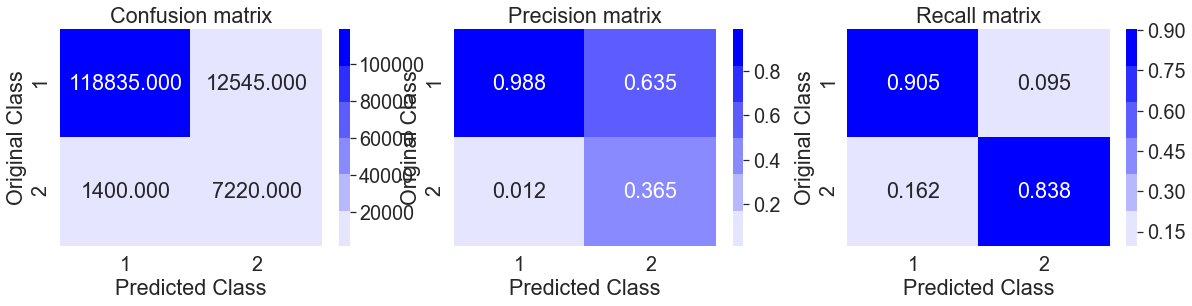

In [63]:
plot_confusion_matrix(y_test, y_pred)

### XGBoost Classifier

In [64]:
params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1, scale_pos_weight=15.25)
model = RandomizedSearchCV(xg, params, scoring=f1,  cv=5, n_jobs= 3, random_state=12, n_iter= 10, verbose=10)
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 10.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 29.6min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 39.2min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 46.2min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 60.5min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 81.1min
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 137.7min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 582.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246A86BCF60>,
                                        'max_depth': <scipy.stats._distn_infrastructure.r

In [66]:
model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.45622174456752607,
 'max_depth': 7,
 'n_estimators': 251}

In [67]:
model.best_score_

0.7209749191529832

In [69]:
y_pred = model.predict(X_test_TFIDF)


print (f1_score(y_test,y_pred))
print (confusion_matrix(y_test, y_pred))

0.49674596462845166
[[119558  11822]
 [  1865   6755]]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95    131380
           1       0.36      0.78      0.50      8620

    accuracy                           0.90    140000
   macro avg       0.67      0.85      0.72    140000
weighted avg       0.95      0.90      0.92    140000



**** Confusion Matrix ******
[[119558  11822]
 [  1865   6755]]
**** Precision Matrix ******
[[0.98464047 0.63637832]
 [0.01535953 0.36362168]]
**** Recall Matrix ******
[[0.91001675 0.08998325]
 [0.21635731 0.78364269]]


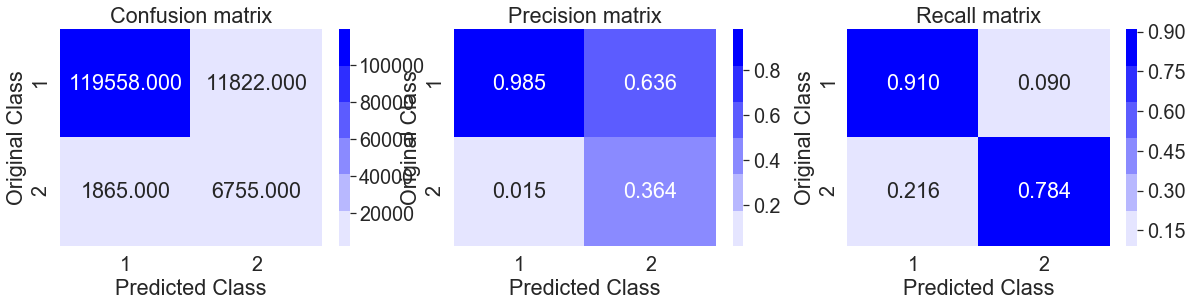

In [71]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools



plot_confusion_matrix(y_test, y_pred)

### Random Forest

In [95]:
X_train_TFIDF.shape

(560000, 20102)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


tuned_parameters = {
        "n_estimators": [1, 5, 10, 50, 100, 500], "max_depth": [1, 5, 10, 50, 100, 500]    
}

DT = RandomForestClassifier(criterion="gini", n_jobs= 6 , class_weight='balanced')
model = RandomizedSearchCV(DT, tuned_parameters, scoring='f1', cv=5, verbose = 10 )
model.fit(X_train_TFIDF, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=500, max_depth=10 ..................................
[CV] ...... n_estimators=500, max_depth=10, score=0.251, total= 1.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] n_estimators=500, max_depth=10 ..................................
[CV] ...... n_estimators=500, max_depth=10, score=0.250, total= 1.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV] n_estimators=500, max_depth=10 ..................................
[CV] ...... n_estimators=500, max_depth=10, score=0.246, total= 1.1min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.4min remaining:    0.0s


[CV] n_estimators=500, max_depth=10 ..................................
[CV] ...... n_estimators=500, max_depth=10, score=0.244, total= 1.1min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s


[CV] n_estimators=500, max_depth=10 ..................................
[CV] ...... n_estimators=500, max_depth=10, score=0.250, total= 1.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.7min remaining:    0.0s


[CV] n_estimators=10, max_depth=10 ...................................
[CV] ....... n_estimators=10, max_depth=10, score=0.241, total=   7.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.8min remaining:    0.0s


[CV] n_estimators=10, max_depth=10 ...................................
[CV] ....... n_estimators=10, max_depth=10, score=0.245, total=   7.2s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  6.0min remaining:    0.0s


[CV] n_estimators=10, max_depth=10 ...................................
[CV] ....... n_estimators=10, max_depth=10, score=0.227, total=   7.6s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.1min remaining:    0.0s


[CV] n_estimators=10, max_depth=10 ...................................
[CV] ....... n_estimators=10, max_depth=10, score=0.241, total=   7.1s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.2min remaining:    0.0s


[CV] n_estimators=10, max_depth=10 ...................................
[CV] ....... n_estimators=10, max_depth=10, score=0.240, total=   7.5s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.256, total=  32.2s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.255, total=  18.2s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.250, total=  19.0s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.241, total=  16.8s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] ...... n_estimators=100, max_depth=10, score=0.252, total=  17.3s
[CV] n_estimators=10, max_depth=5 ....................................
[CV] ........ n_estimators=10, max_depth=5, score=0.223, total=   7.0s
[CV] n

In [ ]:
model.best_score_

In [ ]:
model.best_params_

In [ ]:
y_pred = model.predict(X_test_TFIDF)
score = f1_score(y_test,y_pred)
print (score)
print (confusion_matrix(y_test, y_pred))

In [ ]:
socre = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print (score)
print (confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

### Glove Vector

In [7]:
#glove vector read file in python https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8", errors='ignore')
    model = {}
    for line in tqdm(f):
        splitLine = line.split(" ")
        word = splitLine[0]
        
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.840B.300d/glove.840B.300d.txt')

Loading Glove Model


2196017it [03:29, 10492.70it/s]


Done. 2196016  words loaded!


In [8]:
X_train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
glove_words = set(model.keys())
for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors.append(vector)

print(len(X_train_avg_w2v_vectors))
print(len(X_train_avg_w2v_vectors[0]))


100%|███████████████████████████████████████████████████████████████████████| 560000/560000 [00:15<00:00, 37188.09it/s]


560000
300


In [9]:
X_test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
glove_words = set(model.keys())
for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors.append(vector)

print(len(X_test_avg_w2v_vectors))
print(len(X_test_avg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 140000/140000 [00:03<00:00, 36567.22it/s]


140000
300


In [10]:
from scipy.sparse import hstack
import pickle
X_train_avg_w2v = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_w2v_vectors)).tocsr()
X_test_avg_w2v = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_w2v_vectors)).tocsr()
 
print (X_train_avg_w2v.shape)
print (X_test_avg_w2v.shape)


(560000, 321)
(140000, 321)


In [16]:
pd.to_pickle(X_train_avg_w2v, 'X_train_glove.pkl')
pd.to_pickle(X_test_avg_w2v, 'X_test_glove.pkl')

In [10]:
X_train_avg_w2v = pd.read_pickle('X_train_glove.pkl')
X_test_avg_w2v = pd.read_pickle('X_test_glove.pkl')

In [80]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs= 4, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_avg_w2v, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 293.2min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 294.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 298.0min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 298.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_di

In [81]:
model.best_params_

{'penalty': 'l2', 'alpha': 1e-05}

In [82]:
model.best_score_

0.6945882694276952

In [84]:
y_pred = model.predict(X_test_avg_w2v)

score = f1_score(y_test,y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6426315487838068
[[107260  24120]
 [   714   7906]]


#### XGBoost Classifier

In [11]:
params = {
    "n_estimators": stats.randint(10, 300), 
    "max_depth": stats.randint(2, 10),    
    "learning_rate": stats.uniform(0.01, 1),
     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}        
    
xg = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', reg_lambda=0, reg_alpha= 1, scale_pos_weight=15.25)
model = RandomizedSearchCV(xg, params, scoring=f1,  cv=5, n_jobs= 1, random_state=12, n_iter= 5, verbose=10)
model.fit(X_train_avg_w2v, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.771, total=84.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 84.5min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.776, total=121.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 206.1min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.772, total=107.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 313.1min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.774, total=92.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 405.5min remaining:    0.0s


[CV] colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251 
[CV]  colsample_bytree=0.6, learning_rate=0.45622174456752607, max_depth=7, n_estimators=251, score=0.776, total=70.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 476.4min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.769, total=57.7min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 534.2min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.768, total=58.1min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 592.3min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.767, total=57.7min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 649.9min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.766, total=451.0min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 1101.0min remaining:    0.0s


[CV] colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288 
[CV]  colsample_bytree=0.5, learning_rate=0.5437393933802978, max_depth=6, n_estimators=288, score=0.769, total=78.2min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=40.7min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=25.4min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128, score=0.748, total=34.2min
[CV] colsample_bytree=0.4, learning_rate=0.9107148541170123, max_depth=7, n_estimators=128 
[CV]  colsample_bytree=0.4, learning_rate=0.9107148541170123

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 1686.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=1...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023188860F28>,
                                        'max_depth': <scipy.stats._distn_infrastructure.r

In [12]:
model.best_score_

0.7737282002826076

In [13]:
model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.45622174456752607,
 'max_depth': 7,
 'n_estimators': 251}

In [14]:
y_pred = model.predict(X_test_avg_w2v)

score = f1_score(y_test, y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.7725716063565998
[[126060   5320]
 [  2968   5652]]


In [17]:
score = f1_score(y_test, y_pred)
print (score)

0.5769701919150675


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    131380
           1       0.52      0.66      0.58      8620

    accuracy                           0.94    140000
   macro avg       0.75      0.81      0.77    140000
weighted avg       0.95      0.94      0.94    140000



**** Confusion Matrix ******
[[126060   5320]
 [  2968   5652]]
**** Precision Matrix ******
[[0.97699724 0.48487058]
 [0.02300276 0.51512942]]
**** Recall Matrix ******
[[0.95950677 0.04049323]
 [0.34431555 0.65568445]]


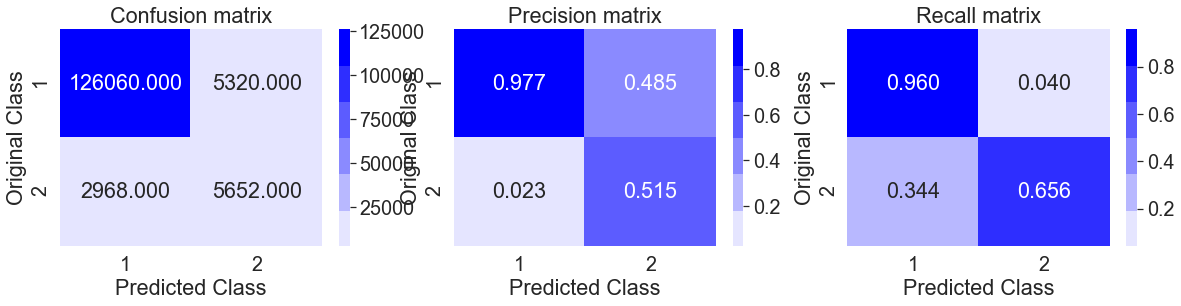

In [16]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools



plot_confusion_matrix(y_test, y_pred)

### Wiki Vector

In [7]:
#glove vector read file in python https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
def loadWikiModel(paragramFile):
    print ("Loading Wikipedia Model")
    f = open(paragramFile,'r', encoding="utf8", errors='ignore')
    model = {}
    for line in tqdm(f):
        splitLine = line.split(" ")
        word = splitLine[0]
        
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
wiki_model = loadWikiModel('wiki-news-300d-1M/wiki-news-300d-1M.vec')

Loading Wikipedia Model


999995it [01:39, 10021.05it/s]


Done. 999995  words loaded!


In [8]:
X_train_avg_wiki_vectors = []; # the avg-w2v for each sentence/review is stored in this list
wiki_words = set(wiki_model.keys())
for sentence in tqdm(X_train['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in wiki_words:
            vector += wiki_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_wiki_vectors.append(vector)

print(len(X_train_avg_wiki_vectors))
print(len(X_train_avg_wiki_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 560000/560000 [00:15<00:00, 35522.22it/s]


560000
300


In [9]:
X_test_avg_wiki_vectors = []; # the avg-w2v for each sentence/review is stored in this list
wiki_words = set(wiki_model.keys())
for sentence in tqdm(X_test['question_text']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in wiki_words:
            vector += wiki_model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_wiki_vectors.append(vector)

print(len(X_test_avg_wiki_vectors))
print(len(X_test_avg_wiki_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 140000/140000 [00:03<00:00, 36603.19it/s]


140000
300


In [10]:
from scipy.sparse import hstack
import pickle
X_train_avg_wiki = hstack((X_train.drop(['question_text'], axis = 1), X_train_avg_wiki_vectors)).tocsr()
X_test_avg_wiki = hstack((X_test.drop(['question_text'], axis = 1), X_test_avg_wiki_vectors)).tocsr()
 
print (X_train_avg_wiki.shape)
print (X_test_avg_wiki.shape)


(560000, 321)
(140000, 321)


In [21]:
# 
params = {
    'penalty': ['l1', 'l2'], 
      'alpha': [10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
}    

SVM = SGDClassifier(loss="hinge", class_weight= "balanced")

model = RandomizedSearchCV(SVM, params, n_jobs=1, random_state=10, scoring=f1, cv=5, n_iter= 10, verbose=10)
model.fit(X_train_avg_wiki, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.703, total= 1.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.632, total=  31.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.667, total=  28.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.681, total=  43.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV] penalty=l2, alpha=1e-05 .........................................
[CV] ............. penalty=l2, alpha=1e-05, score=0.668, total=  43.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.5min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.484, total=  11.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.493, total=  10.8s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.9min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.494, total=  10.7s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.1min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.492, total=  10.9s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min remaining:    0.0s


[CV] penalty=l2, alpha=100 ...........................................
[CV] ............... penalty=l2, alpha=100, score=0.482, total=  10.5s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.633, total=  47.6s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.630, total=  43.8s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.642, total=  54.7s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.593, total=  41.4s
[CV] penalty=l2, alpha=1e-06 .........................................
[CV] ............. penalty=l2, alpha=1e-06, score=0.644, total=  54.1s
[CV] penalty=l1, alpha=1e-07 .........................................
[CV] ............. penalty=l1, alpha=1e-07, score=0.647, total= 3.5min
[CV] p

c:\users\jit\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.4s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.2s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s
[CV] penalty=l1, alpha=1000 ..........................................
[CV] .............. penalty=l1, alpha=1000, score=0.484, total=  10.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 45.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=1,
                   param_di

In [22]:
model.best_score_

0.6701188026258194

In [23]:
y_pred = model.predict(X_test_avg_wiki)

score = f1_score(y_test, y_pred,  average='macro')
print (score)
print (confusion_matrix(y_test, y_pred))

0.6824873338885825
[[113306  18074]
 [  1031   7589]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92    131380
           1       0.30      0.88      0.44      8620

    accuracy                           0.86    140000
   macro avg       0.64      0.87      0.68    140000
weighted avg       0.95      0.86      0.89    140000



In [25]:
score = f1_score(y_test, y_pred)
print (score)

0.44272671586500606


**** Confusion Matrix ******
[[113306  18074]
 [  1031   7589]]
**** Precision Matrix ******
[[0.9909828  0.70428243]
 [0.0090172  0.29571757]]
**** Recall Matrix ******
[[0.86242959 0.13757041]
 [0.11960557 0.88039443]]


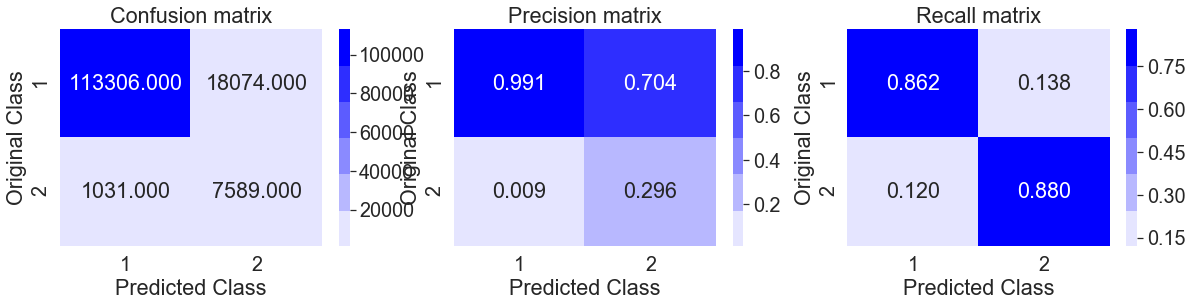

In [26]:
plot_confusion_matrix(y_test, y_pred)

#### Conclusion:

I tried different ML models. 

As you can see that among the models XGBoost with glove vectorizer gave me f1 score of 0.58. 

In [1]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Model", "Vectorizer", "F1-Score"]

x.add_row(["Naive Bayes",  "TFIDF", 0.45 ])
x.add_row(["SVM",  "TFIDF", 0.46 ])
x.add_row(["XGBoost",  "TFIDF", 0.50])
x.add_row(["RF",  "TFIDF", 0.41])
x.add_row(["XGBoost", "Glove"  , 0.58])
x.add_row(["SVM", "Wiki"  , 0.44])

print (x)

+-------------+------------+----------+
|    Model    | Vectorizer | F1-Score |
+-------------+------------+----------+
| Naive Bayes |   TFIDF    |   0.45   |
|     SVM     |   TFIDF    |   0.46   |
|   XGBoost   |   TFIDF    |   0.5    |
|      RF     |   TFIDF    |   0.41   |
|   XGBoost   |   Glove    |   0.58   |
|     SVM     |    Wiki    |   0.44   |
+-------------+------------+----------+
